Add your import statements and the database connection statements in the below code block

Database file path = '/course/data/CSE-578/dinofunworld.db'

In [84]:
# your code here

import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

import math 

conn = sql.connect("/course/data/CSE-578/dinofunworld.db")

### **Question 1:**
Create a distance matrix suitable for use in hierarchical clustering of the checkin sequences of the 5 specified visitors.

Your distance function should count the number of dissimilarities in the sequences without considering any other factors.

**Note** 
* The distance matrix should be reported as a dictionary of dictionaries (eg. {1: {2:0, 3:0, 4:0}, 2: {1:0, 3:0, ...}, ...}).
* The order of the output is not important.

In [85]:
### TEST FUNCTION: test_question1
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here

sequences = pd.read_sql('SELECT * FROM sequences WHERE visitorID IN (165316, 1835254, 296394, 404385, 448990)', conn)
sequences['sequence_list'] = sequences['sequence'].apply(lambda s: s.split("-"))
visitorID_list = sequences['visitorID'].tolist()
dict_to_display = {}
for firstvisitor in visitorID_list:
    temp_dict = {}
    for secondvisitor in visitorID_list:
        counter = 0
        if firstvisitor == secondvisitor:
            continue
        else:
            firstVisitorSequenceList = sequences[sequences['visitorID']==firstvisitor]['sequence_list'].tolist()[0]
            secondVisitorSequenceList = sequences[sequences['visitorID']==secondvisitor]['sequence_list'].tolist()[0]
            for i in range(min(len(firstVisitorSequenceList),len(secondVisitorSequenceList))):
                if firstVisitorSequenceList[i] != secondVisitorSequenceList[i]:
                    counter += 1
        temp_dict[secondvisitor] = counter
    dict_to_display[firstvisitor] = temp_dict
print(dict_to_display)


{165316: {296394: 318, 404385: 329, 448990: 318, 1835254: 336}, 296394: {165316: 318, 404385: 303, 448990: 0, 1835254: 282}, 404385: {165316: 329, 296394: 303, 448990: 303, 1835254: 298}, 448990: {165316: 318, 296394: 0, 404385: 303, 1835254: 282}, 1835254: {165316: 336, 296394: 282, 404385: 298, 448990: 282}}


### **Question 2:**  
Create and display a Parallel Coordinate Plot displaying the minimum, maximum and average attendance for each ride in the park.

For this question, display a Parallel Coordinate Plot in the notebook and print the data used to create a Parallel Coordinate Plot as a dictionary of dictionaries (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... })

**Note:** 
* Not all attractions are rides.
* The output should be a dictionary and the order of the output is not important.
* Use the parallel coordinates function from the **pandas library** to generate the graph.
* The Parallel Coordinate plot must have the below mentioned parameters,
    * legend and it should be outside the plot.
    * y-label ('**Attendance**')
    * title named '**Ride Attendance - Minimum, Maximum, Average**'
* The plot must not have the following parameters,
    * do not set figure size
    * do not set font size or font-weight for titles and labels

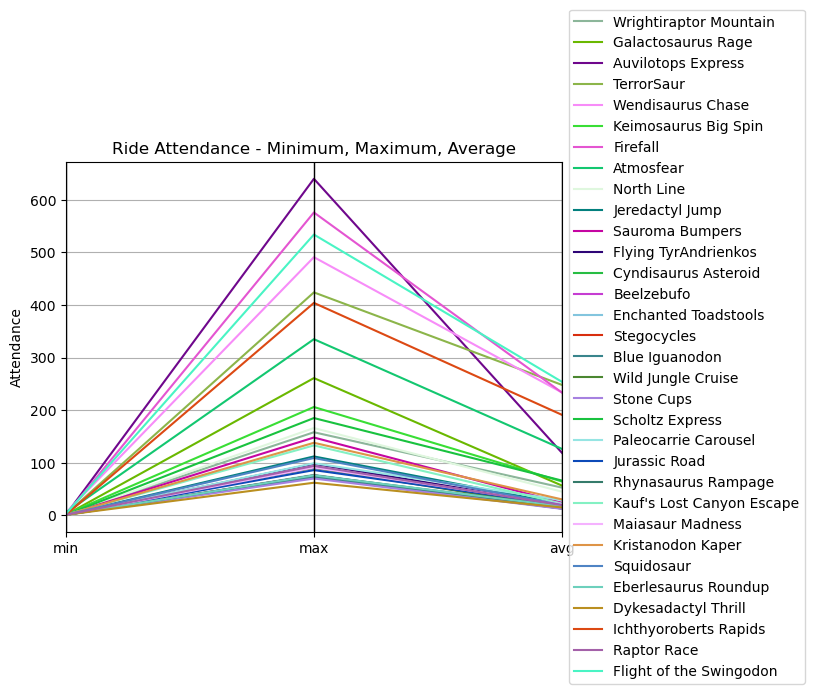

{'Wrightiraptor Mountain': {'min': 1.0, 'max': 158.0, 'avg': 52.75}, 'Galactosaurus Rage': {'min': 1.0, 'max': 261.0, 'avg': 56.63715277777778}, 'Auvilotops Express': {'min': 1.0, 'max': 640.0, 'avg': 118.97916666666667}, 'TerrorSaur': {'min': 2.0, 'max': 424.0, 'avg': 248.09375}, 'Wendisaurus Chase': {'min': 5.0, 'max': 491.0, 'avg': 233.6875}, 'Keimosaurus Big Spin': {'min': 2.0, 'max': 206.0, 'avg': 64.39756944444444}, 'Firefall': {'min': 1.0, 'max': 576.0, 'avg': 233.46875}, 'Atmosfear': {'min': 5.0, 'max': 335.0, 'avg': 126.359375}, 'North Line': {'min': 1.0, 'max': 166.0, 'avg': 45.06944444444444}, 'Jeredactyl Jump': {'min': 1.0, 'max': 112.0, 'avg': 21.66840277777778}, 'Sauroma Bumpers': {'min': 1.0, 'max': 148.0, 'avg': 23.866319444444443}, 'Flying TyrAndrienkos': {'min': 1.0, 'max': 98.0, 'avg': 19.76215277777778}, 'Cyndisaurus Asteroid': {'min': 1.0, 'max': 72.0, 'avg': 12.947916666666666}, 'Beelzebufo': {'min': 1.0, 'max': 93.0, 'avg': 13.869791666666666}, 'Enchanted Toadsto

In [86]:
### TEST FUNCTION: test_question2
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here

# please manually grading
attraction = pd.read_sql("SELECT AttractionID, Name FROM attraction WHERE LOWER(Category) LIKE '%ride%';", conn)
sequences = pd.read_sql("SELECT visitorID,sequence FROM sequences;", conn)
sequences['sequence_list'] = sequences['sequence'].apply(lambda s: s.split("-"))
ride_sequence_dict = {}
ride_name_dict = {}
for index, row in attraction.iterrows():
    ride_sequence_dict[row['AttractionID']] = Counter()
    ride_name_dict[row['AttractionID']] = row['Name']

for index, row in sequences.iterrows():
    sequences_list = row['sequence_list']
    for i, seq in enumerate(sequences_list):
        if int(seq) in ride_sequence_dict:
            ride_sequence_dict[int(seq)][i] += 1
final_df = pd.DataFrame()    
min_list = []
name_list = []
max_list = []
avg_list = []
for key, value in ride_sequence_dict.items():
    min_list.append(min(ride_sequence_dict[key].values()))
    max_list.append(max(ride_sequence_dict[key].values()))
    avg_list.append((sum(ride_sequence_dict[key].values()) / 576))
    #avg_list.append(sum(ride_sequence_dict[key].values()) / len(ride_sequence_dict[key].values())) # this is incorrect line
    #avg_list.append(576  / len(ride_sequence_dict[key].values())) # this is incorrect line
    name_list.append(ride_name_dict[key])
final_df['Ride_Name'] = name_list
final_df['min'] = min_list
final_df['max'] = max_list
final_df['avg'] = avg_list

# Create the plot
ax = pd.plotting.parallel_coordinates(final_df, 'Ride_Name')

# Set the title
ax.set_title('Ride Attendance - Minimum, Maximum, Average')

# Set the y-label
ax.set_ylabel('Attendance')

# Move the legend outside of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


# Convert the DataFrame to a dictionary of dictionaries
final_dict = final_df.set_index('Ride_Name').T.to_dict()

# Check if the output is of type dict
#if isinstance(final_dict, dict):
#   print("The output is of type dict.")
#else:
#    print("The output is not of type dict.")


print(final_dict)



### **Question 3:**
Create and display a Scatterplot Matrix displaying the minimum, maximum and average attendance for each ride in the park.


**Note:** 
* Print the output values of Question 2 as the same data will be used for Scatterplot.
* The output should be a dictionary (eg: {  'Ride1' : {min : 1, max : 3, avg : 2 }, 'Ride2' :{ min : 1, max : 3, avg : 2 } ... }) and the order of the output is not important.
* This is a different view into the same data as the previous part. Use the scatter plot matrix function from the **pandas library** to generate the graph.
* While you work on these plots, consider the different things that each chart says about the data.
* The Scatterplot must have the below mentioned parameters,
    * title named ' **Scatterplot Matrix - Minimum, Maximum, Average Attendance** '
* The plot must not have the following parameters,
    * legend
    * do not set figure size
    * do not set font size or font-weight for titles and labels

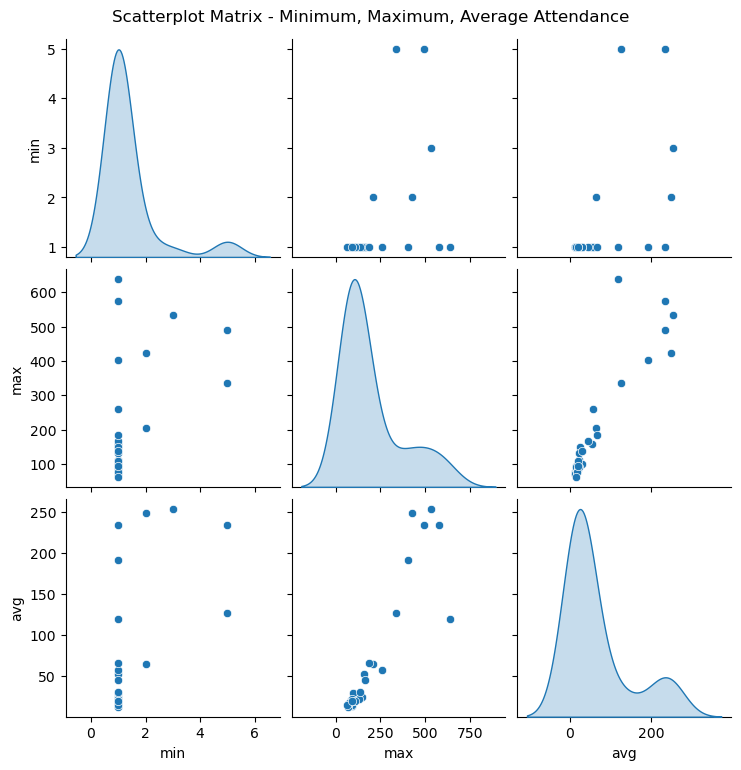

{'Wrightiraptor Mountain': {'min': 1.0, 'max': 158.0, 'avg': 52.75}, 'Galactosaurus Rage': {'min': 1.0, 'max': 261.0, 'avg': 56.63715277777778}, 'Auvilotops Express': {'min': 1.0, 'max': 640.0, 'avg': 118.97916666666667}, 'TerrorSaur': {'min': 2.0, 'max': 424.0, 'avg': 248.09375}, 'Wendisaurus Chase': {'min': 5.0, 'max': 491.0, 'avg': 233.6875}, 'Keimosaurus Big Spin': {'min': 2.0, 'max': 206.0, 'avg': 64.39756944444444}, 'Firefall': {'min': 1.0, 'max': 576.0, 'avg': 233.46875}, 'Atmosfear': {'min': 5.0, 'max': 335.0, 'avg': 126.359375}, 'North Line': {'min': 1.0, 'max': 166.0, 'avg': 45.06944444444444}, 'Jeredactyl Jump': {'min': 1.0, 'max': 112.0, 'avg': 21.66840277777778}, 'Sauroma Bumpers': {'min': 1.0, 'max': 148.0, 'avg': 23.866319444444443}, 'Flying TyrAndrienkos': {'min': 1.0, 'max': 98.0, 'avg': 19.76215277777778}, 'Cyndisaurus Asteroid': {'min': 1.0, 'max': 72.0, 'avg': 12.947916666666666}, 'Beelzebufo': {'min': 1.0, 'max': 93.0, 'avg': 13.869791666666666}, 'Enchanted Toadsto

In [87]:
### TEST FUNCTION: test_question3
# DO NOT REMOVE OR MODIFY THE ABOVE LINE
# your code here

import matplotlib.pyplot as plt
import seaborn as sns


# Create the Scatterplot Matrix
sns.pairplot(final_df, diag_kind='kde')

# Set the title
plt.suptitle('Scatterplot Matrix - Minimum, Maximum, Average Attendance', y=1.02)

plt.show()

print(final_dict)


#print(type(final_dict))


